# P110_Classification of bankruptcy-prevention

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To see every columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv("C:/Users/Ashraf/Downloads/Assignment/bankruptcy-prevention.csv",delimiter=';')
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [4]:
# To checking the shape of datset
df.shape

(250, 7)

Inference: We have 250 columns and 7 rows

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [6]:
# To checking null values
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

Inference: No NA values present in our dataset

In [7]:
# count of duplicates rows
df[df.duplicated()].shape

(147, 7)

In [8]:
# Print duplicates rows
df[df.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
22,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
24,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
26,0.5,0.5,0.0,0.0,0.0,1.0,bankruptcy
29,0.0,0.5,0.0,0.0,0.0,1.0,bankruptcy
30,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [9]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

Inference: Look at the columns there are more  columns with unspaced in single quotes so we cannot  work with these columns lets renames its.

In [10]:
df2 = df.rename({'industrial_risk':'industrial_risk', ' management_risk':'management_risk',
                 ' financial_flexibility':'financial_flexibility',
                 ' credibility':'credibility', ' competitiveness':'competitiveness', ' operating_risk':'operating_risk',
                 ' class':'class'},axis=1)

In [11]:
df2.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

## Outliers Removal Using Descriptive Stats
A commonly used rule says that a datapoint is an outliers if it is more then 1.5*IQR above the Third Quartile or Below the first Quartile

In [12]:
# summary
df2.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Inference: After looking the descriptrive stats we can say that their is no outliers present in our dataset

# Visualization

In [13]:
df2['industrial_risk'].value_counts()

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

<AxesSubplot:>

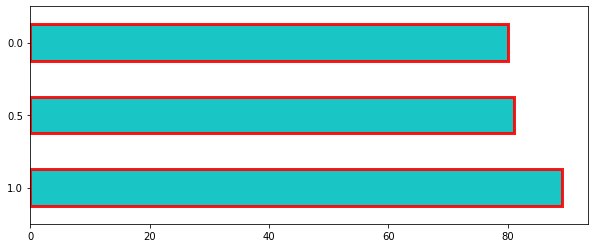

In [14]:
# count plot for industrial_risk coulumn
plt.figure(figsize=(10,4))
df2['industrial_risk'].value_counts().plot(kind='barh',color='c',edgecolor='r',linewidth=3,alpha=0.9)

Inference: In industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.


<AxesSubplot:>

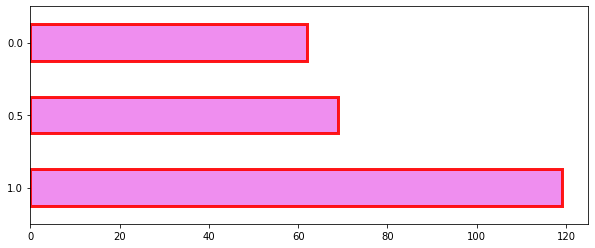

In [15]:
# count plot for management_risk column
plt.figure(figsize=(10,4))
df2['management_risk'].value_counts().plot(kind='barh',color='violet',edgecolor='r',linewidth=3,alpha=0.9)

Inference: In management_risk: 0=low risk, 0.5=medium risk, 1=high risk.

<AxesSubplot:>

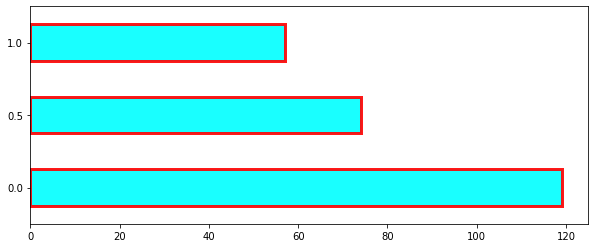

In [16]:
# count plot for financial_flexibility column
plt.figure(figsize=(10,4))
df2['financial_flexibility'].value_counts().plot(kind='barh',color='aqua',edgecolor='r',linewidth=3,alpha=0.9)

Inference:In financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.

<AxesSubplot:>

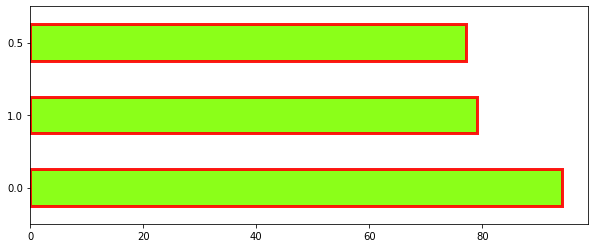

In [17]:
# count plot for credibility column
plt.figure(figsize=(10,4))
df2['credibility'].value_counts().plot(kind='barh',color='#7FFF00',edgecolor='r',linewidth=3,alpha=0.9)

Infrence:In credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility

<AxesSubplot:>

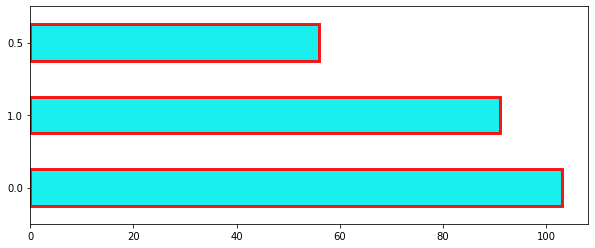

In [18]:
# count plot for competitiveness column
plt.figure(figsize=(10,4))
df2['competitiveness'].value_counts().plot(kind='barh',color='#00EEEE',edgecolor='r',linewidth=3,alpha=0.9)

Inference:In competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.

<AxesSubplot:>

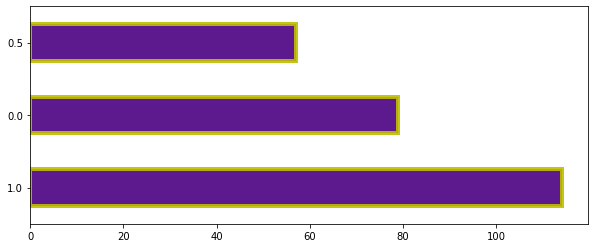

In [19]:
# count plot for operating_risk column
plt.figure(figsize=(10,4))
df2['operating_risk'].value_counts().plot(kind='barh',color='indigo',edgecolor='y',linewidth=4,alpha=0.9)

Infrence:In operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.

In [20]:
df2['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

<AxesSubplot:>

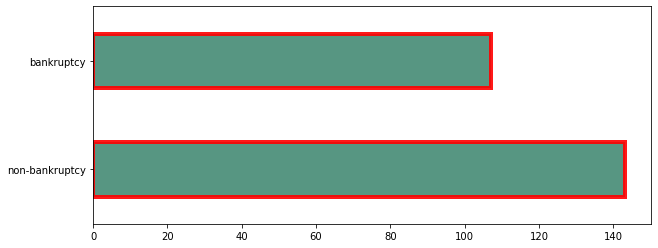

In [21]:
# count plot for target variable
plt.figure(figsize=(10,4))
df2['class'].value_counts().plot(kind='barh',color='#458B74',edgecolor='r',linewidth=4,alpha=0.9)

Inference: 78 records for non-bankruptcy and 25 records for bankruptcy

# Lable Encoding 

In [22]:
df2

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


In [23]:
df2['class']= df2['class'].replace(('bankruptcy','non-bankruptcy'),(1,0))

In [24]:
df2

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
5,1.0,1.0,0.0,0.5,0.0,0.5,1
6,1.0,1.0,0.0,0.0,0.0,0.0,1
7,1.0,1.0,0.0,0.0,0.0,0.5,1
8,1.0,1.0,0.0,0.5,0.0,0.0,1
9,1.0,1.0,0.0,0.5,0.0,1.0,1


# Spliting dataset into X and y

In [25]:
X = df2.drop(['class'],axis=1)
y = df2['class']

# Feature Engineering
## Univariate Feature Selection

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [27]:
# apply SelectKBest class to extract top 6 best features

bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X, y)

featureScores_univ = pd.DataFrame({'variables':X.columns, 'Score':fit.scores_})
featureScores_univ.sort_values(by=['Score'], ascending=False)

,variables,Score
4,competitiveness,82.186252
2,financial_flexibility,60.237242
3,credibility,52.307251
1,management_risk,9.407190
5,operating_risk,6.458129
0,industrial_risk,4.225298


High chi2 value suggest, feature is useful in predicting the class variable

# Feature Importance By Decision Tree

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import DecisionTreeClassifier
import matplotlib.pyplot as plt

[0.02284301 0.03536766 0.26633222 0.23893315 0.40958897 0.02693499]


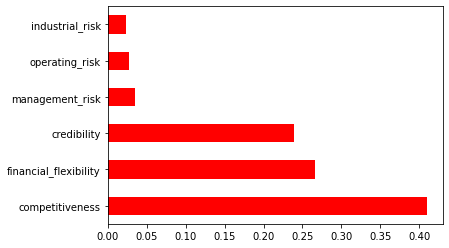

In [29]:
# use inbuilt class feature_importances of tree based classifiers
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh', color='r')
plt.show()

In [30]:
featureScores_dt = pd.DataFrame({'variables':X.columns, 'Score':model.feature_importances_})
featureScores_dt.sort_values(by=['Score'], ascending=False)

,variables,Score
4,competitiveness,0.409589
2,financial_flexibility,0.266332
3,credibility,0.238933
1,management_risk,0.035368
5,operating_risk,0.026935
0,industrial_risk,0.022843


# Recursive Feature Elimination

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [32]:
# feature extraction with RFE

model = LogisticRegression(max_iter=2500)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

fit.n_features_

3

In [33]:
fit.support_

array([False, False,  True,  True,  True, False])

In [34]:
# Feature Ranking
fit.ranking_

array([3, 2, 1, 1, 1, 4])

In [35]:
featureScores_rfe = pd.DataFrame({'variables':X.columns, 'Rankings':fit.ranking_})
featureScores_rfe.sort_values(by=['Rankings'])

,variables,Rankings
2,financial_flexibility,1
3,credibility,1
4,competitiveness,1
1,management_risk,2
0,industrial_risk,3
5,operating_risk,4


By considering all 3 feature selection techniques 'industrial_risk' looks less useful in predicting the target variable among all predictors. Out of 3 techniques in univarient and decision tree 'industrial_risk' is at bottom of prediction score by decision tree and univarient, and of 2nd least score in RFE

In [36]:
# droping industrial_risk
X.drop(['industrial_risk'],axis=1,inplace=True)

In [37]:
# final dataset
X.head()

,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,1.0,0.0,0.0,0.0,0.5
1,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.5,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0


# Different Model Building For Classification

1.Random Forest Classification

2.AdaBoost Classification

3.Logistic Regression

4.K Nearest Neighbour

5.Support Vector Machine (SVM) Classifier

6.Stacking Ensemble for Classification

### 1. Random Forest Classification

In [38]:
from sklearn.model_selection import train_test_split
#train, test = train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [41]:
num_trees = 10
# max features: sqrt(n_features)
max_features = 3

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_RFC = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results_RFC = cross_val_score(model_RFC, X, y, cv=kfold, scoring="accuracy")

print(f'Scores for each fold are: {results_RFC}')
print(f'Average score: {"{:.2f}".format(results_RFC.mean())}')


Scores for each fold are: [1.   1.   0.98 1.   1.  ]
Average score: 1.00


In [42]:
# model fit and validate
model_RFC.fit(X_train, y_train)
preds = model_RFC.predict(X_test)
print("Training Accuracy: ", model_RFC.score(X_train, y_train))
print('Testing Accuarcy: ', model_RFC.score(X_test, y_test))


Training Accuracy:  1.0
Testing Accuarcy:  1.0


In [43]:
print('Classification report for Random Forest model')
f1_rfc = f1_score(y_test, preds)
precision_rfc = precision_score(y_test, preds)
recall_rfc = recall_score(y_test, preds)

print('F1 is: ', f1_rfc)
print('Precision is: ', precision_rfc)
print('Recall is: ', recall_rfc)

Classification report for Random Forest model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


### 2. AdaBoost Classification

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
num_trees = 10
seed = 7

kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
model_AdB = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_AdB = cross_val_score(model_AdB, X, y, cv=kfold, scoring="accuracy")

print(results_AdB.mean())

0.992


In [46]:
# model fit and validate

model_AdB.fit(X_train, y_train)
preds = model_AdB.predict(X_test)
print("Training Accuracy: ", model_AdB.score(X_train, y_train))
print('Testing Accuarcy: ', model_AdB.score(X_test, y_test))


Training Accuracy:  1.0
Testing Accuarcy:  1.0


In [47]:
f1_adb = f1_score(y_test, preds)
precision_adb = precision_score(y_test, preds)
recall_adb = recall_score(y_test, preds)

print('F1 is: ', f1_adb)
print('Precision is: ', precision_adb)
print('Recall is: ', recall_adb)

F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


### 3. Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_LR = LogisticRegression(random_state= 42)
results_LR = cross_val_score(model_LR, X, y, cv= kfold, scoring="accuracy")

print(f'Scores for each fold are: {results_LR}')
print(f'Average score: {"{:.2f}".format(results_LR.mean())}')

Scores for each fold are: [0.98 1.   1.   0.98 1.  ]
Average score: 0.99


In [49]:
# model fit and validate

model_LR.fit(X_train, y_train)
preds = model_LR.predict(X_test)
print("Training Accuracy: ", model_LR.score(X_train, y_train))
print('Testing Accuarcy: ', model_LR.score(X_test, y_test))


Training Accuracy:  1.0
Testing Accuarcy:  0.9866666666666667


In [50]:
print('Classification report for Logistic Regression model')
f1_LR = f1_score(y_test, preds)
precision_LR = precision_score(y_test, preds)
recall_LR = recall_score(y_test, preds)

print('F1 is: ', f1_LR)
print('Precision is: ', precision_LR)
print('Recall is: ', recall_LR)

Classification report for Logistic Regression model
F1 is:  0.9876543209876543
Precision is:  1.0
Recall is:  0.975609756097561


### 4. K Nearest Neighbour

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
# Grid Search for Algorithm Tuning

n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [53]:
print(grid.best_score_)
print(grid.best_params_)

0.9960000000000001
{'n_neighbors': 1}


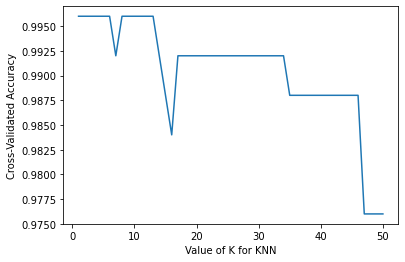

In [54]:
# Visualizing the CV results

k_range = range(1, 51)
k_scores = []

# Use iteration to caclulator different K in models, 
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
    
# Plot to see clearly

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [55]:
# Model with tuned parameters, balanced data

model_KNN = KNeighborsClassifier(n_neighbors=1)
results_KNN = cross_val_score(model_KNN, X, y, cv=kfold, scoring="accuracy")

print(results_KNN.mean())

0.992


In [56]:
model_KNN.fit(X_train, y_train)
preds = model_KNN.predict(X_test)
print("Training Accuracy: ", model_KNN.score(X_train, y_train))
print('Testing Accuarcy: ', model_KNN.score(X_test, y_test))


Training Accuracy:  1.0
Testing Accuarcy:  0.9866666666666667


In [57]:
print('Classification report for K Nearest Neighbour model')
f1_KNN = f1_score(y_test, preds)
precision_KNN = precision_score(y_test, preds)
recall_KNN = recall_score(y_test, preds)

print('F1 is: ', f1_KNN)
print('Precision is: ', precision_KNN)
print('Recall is: ', recall_KNN)

Classification report for K Nearest Neighbour model
F1 is:  0.9876543209876543
Precision is:  1.0
Recall is:  0.975609756097561


### 5. Support Vector Machine (SVM) Classifier

In [58]:
from sklearn import svm

In [59]:
# Grid Search/hyper parameter Tuning

model = svm.SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,10,0.1,0.001] }]
gsv = GridSearchCV(model, param_grid, cv=5)
gsv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [60]:
gsv.best_params_ , gsv.best_score_ 

({'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}, 1.0)

In [61]:
# Model with parameters from grid search

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
model_SVM = svm.SVC(C= 15, gamma = 0.5)
results_SVM = cross_val_score(model_SVM, X, y, cv=kfold, scoring="accuracy")

print(results_SVM.mean())

0.9960000000000001


In [62]:
model_SVM.fit(X_train, y_train)
preds = model_SVM.predict(X_test)
print("Training Accuracy: ", model_SVM.score(X_train, y_train))
print('Testing Accuarcy: ', model_SVM.score(X_test, y_test))


Training Accuracy:  1.0
Testing Accuarcy:  0.9866666666666667


In [63]:
print('Classification report for SVM model')
f1_SVM = f1_score(y_test, preds)
precision_SVM = precision_score(y_test, preds)
recall_SVM = recall_score(y_test, preds)

print('F1 is: ', f1_SVM)
print('Precision is: ', precision_SVM)
print('Recall is: ', recall_SVM)

Classification report for SVM model
F1 is:  0.9876543209876543
Precision is:  1.0
Recall is:  0.975609756097561


### 6. Stacking Ensemble for Classification

In [64]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [65]:
kfold = KFold(n_splits=5, shuffle=True, random_state=7)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=100)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = KNeighborsClassifier(n_neighbors=17)
estimators.append(('knn', model3))

model4 = RandomForestClassifier(n_estimators=10, max_features=3)
estimators.append(('rfc', model4))
model5 = AdaBoostClassifier(n_estimators=10, random_state=7)
estimators.append(('adb', model5))

# create the ensemble model
ensemble_stack = VotingClassifier(estimators)
results_stcking = cross_val_score(ensemble_stack, X, y, cv=kfold, scoring="accuracy")

print(results_stcking.mean())
#print(results_stcking.itemset())


0.9879999999999999


In [66]:
ensemble_stack.fit(X_train, y_train)
preds = ensemble_stack.predict(X_test)
print("Training Accuracy: ", ensemble_stack.score(X_train, y_train))
print('Testing Accuarcy: ', ensemble_stack.score(X_test, y_test))


Training Accuracy:  1.0
Testing Accuarcy:  1.0


In [67]:
print('Classification report for Stacking Ensemble model')
f1_stacking = f1_score(y_test, preds)
precision_stacking = precision_score(y_test, preds)
recall_stacking = recall_score(y_test, preds)

print('F1 is: ', f1_stacking)
print('Precision is: ', precision_stacking)
print('Recall is: ', recall_stacking)

Classification report for Stacking Ensemble model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


## Models Evaluation

In [68]:
# Storing results in a data frame

d1 = {'Models':['Random Forest','Ada Boost','Logistic Regression','KNN','SVM',
                'Stacking ensemble'], 
      'Accuracy':[results_RFC.mean(), results_AdB.mean(), results_LR.mean(), results_KNN.mean(), results_SVM.mean(), 
             results_stcking.mean()],
     'F1_Score':[f1_rfc, f1_adb, f1_LR, f1_KNN, f1_SVM, f1_stacking],
     'Precision':[precision_rfc, precision_adb, precision_LR, precision_KNN, precision_SVM, precision_stacking],
     'Recall':[recall_rfc, recall_adb, recall_LR, recall_KNN, recall_SVM, recall_stacking]}
results_df = pd.DataFrame(d1)
results_df.sort_values(by=['Accuracy'], ascending=False)

,Models,Accuracy,F1_Score,Precision,Recall
0,Random Forest,0.996,1.000000,1.0,1.00000
4,SVM,0.996,0.987654,1.0,0.97561
1,Ada Boost,0.992,1.000000,1.0,1.00000
2,Logistic Regression,0.992,0.987654,1.0,0.97561
3,KNN,0.992,0.987654,1.0,0.97561
5,Stacking ensemble,0.988,1.000000,1.0,1.00000


# Our Final Model is SVM

In [69]:
# Building a model on SVM
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [70]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [71]:
## Taken data from data set 
t = clf.predict([[1.0, 0.0, 0.0, 0.0, 0.5]])

C:\Users\Ashraf\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [72]:
print(t)

[1]


In [73]:
y_pred_df= pd.DataFrame({'actual': y_test,
                         'predicted_prob': clf.predict(X_test)})

In [74]:
y_pred_df

,actual,predicted_prob
179,0,0
72,1,0
156,0,0
118,0,0
70,1,1
177,0,0
228,0,0
89,1,1
184,0,0
14,1,1


## Saving the Trained Model

In [75]:
import pickle 
file = 'C:/Users/Ashraf/Downloads/files/P110_Model.pkl'
with open(file,'wb') as f:
    pickle.dump(clf,f)

In [76]:
# Loading the model
with open(file,'rb') as f:
    h = pickle.load(f)

In [77]:
# Predicting 
cy = h.predict([[1.0, 0.0, 0.0, 0.0, 0.5]])
print(cy)

[1]


C:\Users\Ashraf\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
